In [1]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from numpy.random import uniform
import random
from KMEANS import kmeans
from Visualization import visualization, interactive_visualization

In [2]:
df = pd.read_csv('iris-clustering.csv')

In [3]:
#Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

#Normalizing the data so that the data approximately follows a Gaussian distribution
df_normalized = normalize(df_scaled)

In [4]:
#Converting the numpy array into a pandas DataFrame
df_normalized = pd.DataFrame(df_normalized)
#Renaming the columns
df_normalized.columns = df.columns
pd.reset_option('display.max_rows')
df_normalized

,sepal_length,sepal_width,petal_length,petal_width
0,-0.390160,0.434679,-0.578623,-0.569232
1,-0.518512,-0.057373,-0.608179,-0.598308
2,-0.578457,0.136859,-0.584726,-0.552043
3,-0.631489,0.042163,-0.540152,-0.554689
4,-0.414170,0.499298,-0.542513,-0.533708
...,...,...,...,...
142,0.523599,-0.065691,0.415349,0.740954
143,0.298304,-0.709171,0.386639,0.508529
144,0.505268,-0.083092,0.525372,0.679548
145,0.215038,0.408781,0.477856,0.747202


In [5]:
k = 3
data = df_normalized.values
clusters, centroids = kmeans(data, k)

In [6]:
# Calculate metrics
ch_index = calinski_harabasz_score(df_normalized, clusters)
silhouette_avg = silhouette_score(df_normalized, clusters)
db_index = davies_bouldin_score(df_normalized, clusters)

print("Silhouette Score:", silhouette_avg)
print("Calinski Harabasz Score:", ch_index)
print("Davies Bouldin Index:", db_index)

Silhouette Score: 0.5557248194440956
Calinski Harabasz Score: 276.79177028777923
Davies Bouldin Index: 0.7300314087324815


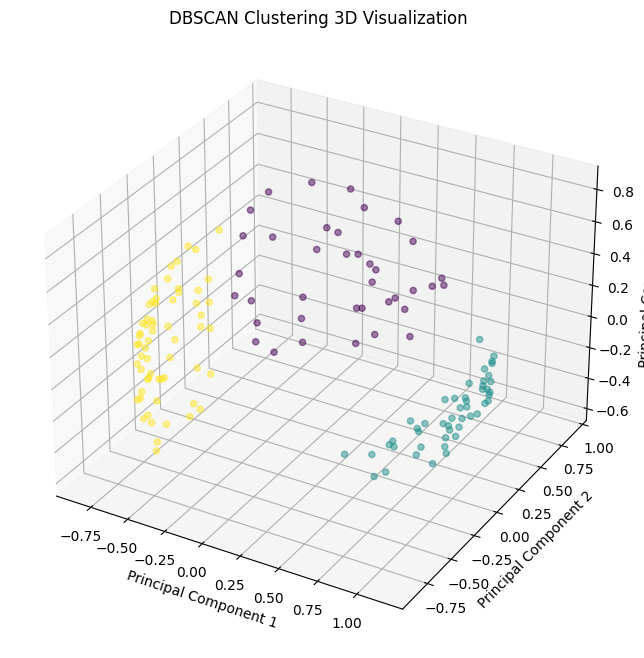

In [7]:
visualization(df_normalized, clusters)

In [8]:
interactive_visualization(df_normalized, clusters)

In [9]:
print(clusters.tolist().count(1))

48
